In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import cv2

In [126]:
def rotate90(img):
#     rows,cols = img.shape
#     M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
#     dst = cv2.warpAffine(img, M, (cols, rows))
    dst = img.T

    return dst    

In [101]:
def affineTransformation(img, padding, orientation=True):
    rows,cols = img.shape
    # create padding, orientation: True=right shift, False = left shift    
    if(orientation):
        img = np.pad(img, pad_width=((0,0),(0,padding)), mode='constant', constant_values=(255, 255))
    else:
        img = np.pad(img, pad_width=((0,0),(padding,0)), mode='constant', constant_values=(255, 255))        
    rows_pad, cols_pad = img.shape
    
    # calculate points 
    if(orientation):
        A0 = (0,0); B0 = (cols, 0); C0 = (0, rows)        
        
        A1 = (padding, rows - np.floor(np.sqrt(rows**2 - padding**2)))
        B1 = (cols+padding, rows - np.floor(np.sqrt(rows**2 - padding**2)))
        C1 = (0, rows)
        
        pts0 = np.float32([A0,B0,C0])
        pts1 = np.float32([A1,B1,C1])
    else:
        A0 = (padding,0); B0 = (padding+cols, 0); C0 = (padding, rows)
        
        A1 = (0, rows - np.floor(np.sqrt(rows**2 - padding**2)))
        B1 = (cols, rows - np.floor(np.sqrt(rows**2 - padding**2)))
        C1 = (padding, rows)
        
        pts0 = np.float32([A0,B0,C0])
        pts1 = np.float32([A1,B1,C1])        
    
    M = cv2.getAffineTransform(pts0,pts1)
    dst = cv2.warpAffine(img, M, (cols_pad,rows_pad), borderValue=(255,255))
    return dst

In [92]:
def saveImg(img, filename):
    cv2.imwrite('HOG/train/' + filename + '.jpg', img)

In [128]:
import os

# TRAIN with all images 
rootdir = os.getcwd()
# loop over the image paths in the training set
for subdir, dirs, files in os.walk(rootdir):
    if subdir.split('HOG\\')[-1] == 'train':
        for img_name in files:
            try:
                img = cv2.imread(subdir+'\\'+img_name, 0)
                img90 = rotate90(img)
                filename = "{0}_rot90".format(img_name.split('.')[0])
                saveImg(img90, filename)
                for i in range(20, 70, 10):
                    filename = "{0}_{1}_right".format(img_name.split('.')[0], i)
                    pic_right = affineTransformation(img.copy(), i, True)
                    saveImg(pic_right, filename)
                    pic_right_90 = rotate90(pic_right)
                    saveImg(pic_right_90, filename+'_rot'+str(90))
                    
                    filename = "{0}_{1}_left".format(img_name.split('.')[0], i)
                    pic_left = affineTransformation(img.copy(), i, False)
                    saveImg(pic_left, filename)
                    pic_left_90 = rotate90(pic_left)
                    saveImg(pic_left_90, filename+'_rot'+str(90))
            except ValueError:
                ('fail by train image: ', img_name)

(120, 119)
(120, 149)
(149, 120)


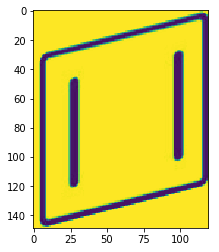

In [127]:
test = cv2.imread('HOG/train/f1.jpg', 0)
print(test.shape)

test = affineTransformation(test.copy(), 30)
print(test.shape)

test = rotate90(test)
#test = test.T
print(test.shape)

plt.imshow(test)